<a href="https://colab.research.google.com/github/arleswasb/projeto_PP_03/blob/main/Pjt_PP_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

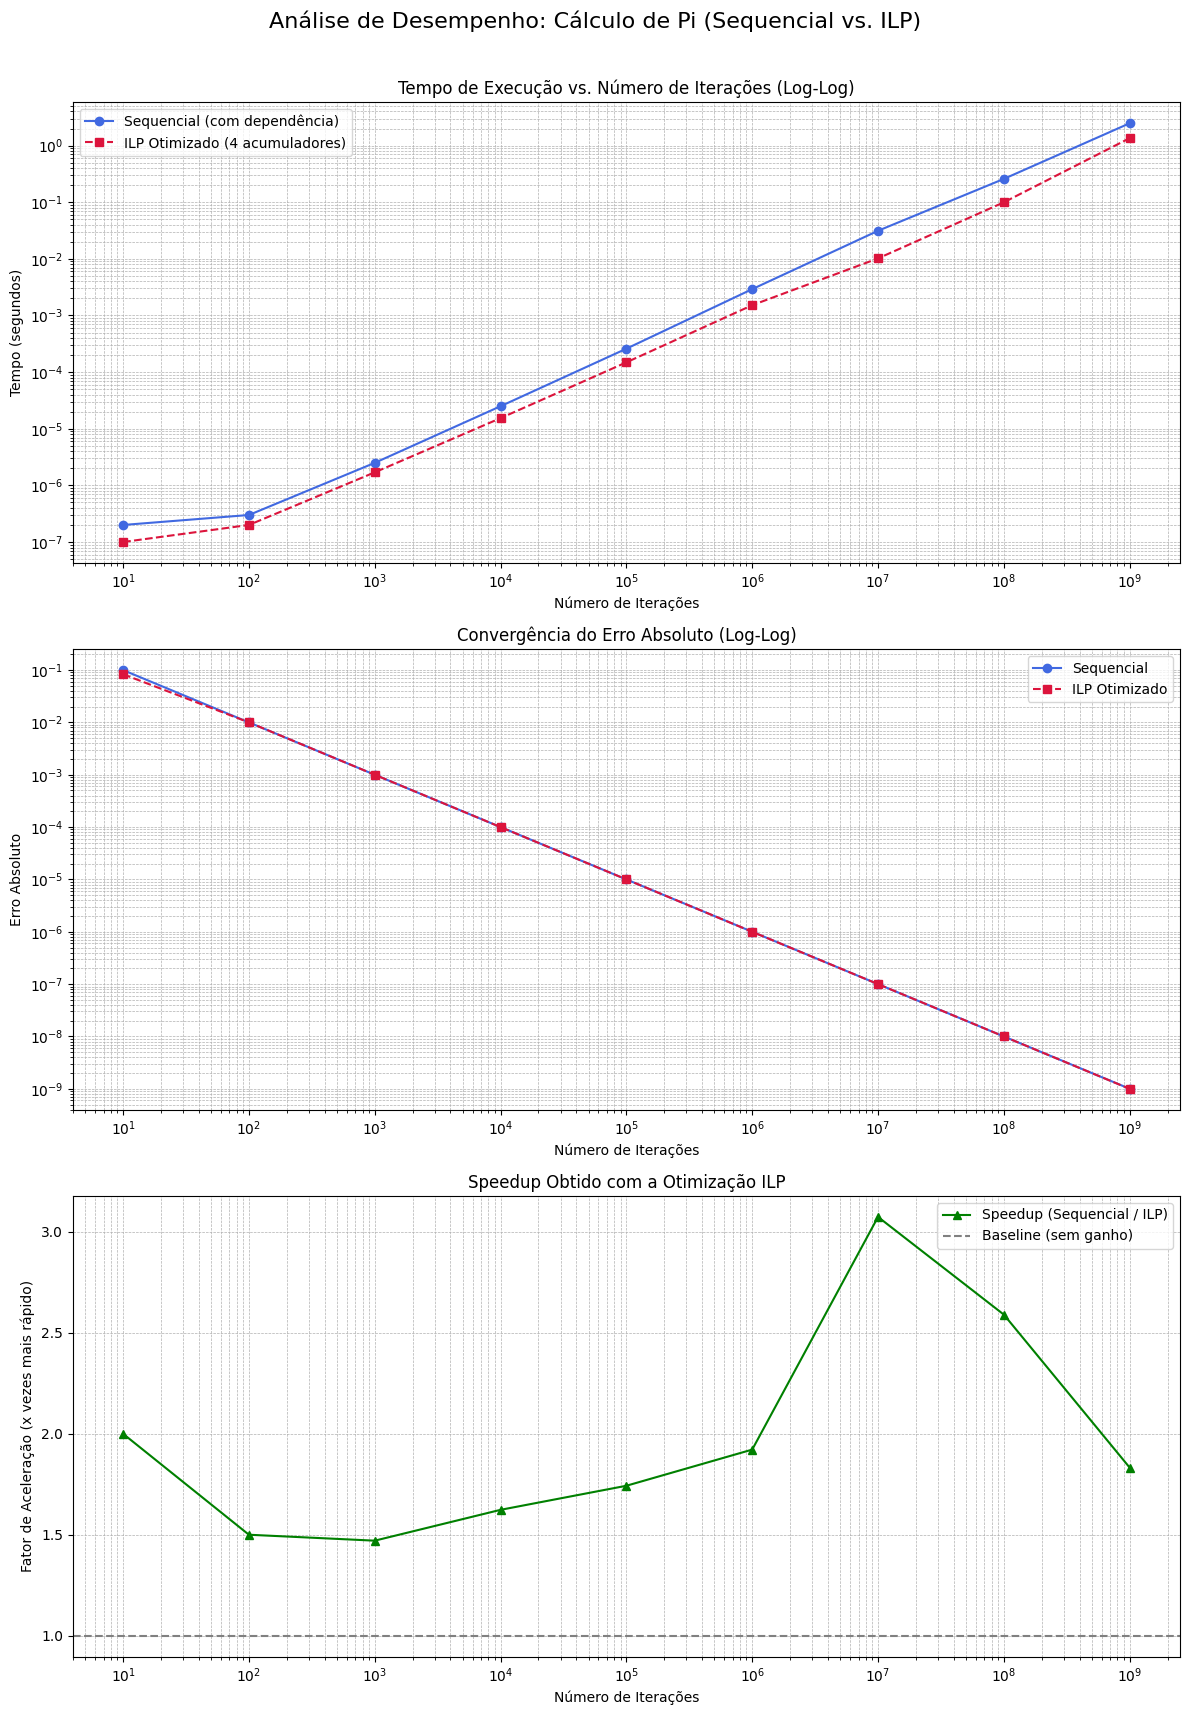

Gráfico 'pi_performance_analysis.png' gerado com sucesso.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def analyze_pi_data(csv_filepath):
    """
    Lê os dados de desempenho do cálculo de Pi de um ficheiro CSV,
    analisa os resultados e gera gráficos comparativos.

    Args:
        csv_filepath (str): O caminho para o ficheiro pi_results.csv.
    """
    try:
        # --- 1. Carregamento e Preparação dos Dados ---
        # Utiliza o pandas para ler o CSV de forma eficiente.
        df = pd.read_csv(csv_filepath)

        # Separa os dados em dois DataFrames para cada método, facilitando a plotagem.
        df_seq = df[df['Metodo'] == 'Sequencial'].copy()
        df_ilp = df[df['Metodo'] == 'ILP_Otimizado'].copy()

        # Garante que os dados estão ordenados por iterações para a plotagem.
        df_seq = df_seq.sort_values(by='Iteracoes')
        df_ilp = df_ilp.sort_values(by='Iteracoes')

        # --- 2. Criação dos Gráficos ---
        # Utiliza subplots para criar uma figura única com múltiplos gráficos.
        # figsize ajusta o tamanho total da figura para melhor visualização.
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
        fig.suptitle('Análise de Desempenho: Cálculo de Pi (Sequencial vs. ILP)', fontsize=16, y=0.95)

        # --- Gráfico 1: Tempo de Execução vs. Número de Iterações ---
        ax1.plot(df_seq['Iteracoes'], df_seq['Tempo_s'], 'o-', label='Sequencial (com dependência)', color='royalblue')
        ax1.plot(df_ilp['Iteracoes'], df_ilp['Tempo_s'], 's--', label='ILP Otimizado (4 acumuladores)', color='crimson')
        ax1.set_xscale('log') # Escala logarítmica é essencial para visualizar ordens de magnitude.
        ax1.set_yscale('log')
        ax1.set_title('Tempo de Execução vs. Número de Iterações (Log-Log)')
        ax1.set_xlabel('Número de Iterações')
        ax1.set_ylabel('Tempo (segundos)')
        ax1.grid(True, which="both", ls="--", linewidth=0.5)
        ax1.legend()

        # --- Gráfico 2: Erro Absoluto vs. Número de Iterações ---
        ax2.plot(df_seq['Iteracoes'], df_seq['ErroAbsoluto'], 'o-', label='Sequencial', color='royalblue')
        ax2.plot(df_ilp['Iteracoes'], df_ilp['ErroAbsoluto'], 's--', label='ILP Otimizado', color='crimson')
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_title('Convergência do Erro Absoluto (Log-Log)')
        ax2.set_xlabel('Número de Iterações')
        ax2.set_ylabel('Erro Absoluto')
        ax2.grid(True, which="both", ls="--", linewidth=0.5)
        ax2.legend()

        # --- Gráfico 3: Speedup da Otimização ILP ---
        # O speedup é a razão entre o tempo da versão lenta e o da versão rápida.
        # Adiciona um valor muito pequeno para evitar divisão por zero em tempos medidos como 0.0.
        epsilon = 1e-12
        speedup = df_seq['Tempo_s'].values / (df_ilp['Tempo_s'].values + epsilon)

        # Ignora o speedup para poucas iterações onde o tempo é zero ou instável.
        valid_iterations = df_seq['Iteracoes'][df_seq['Tempo_s'] > 0]
        valid_speedup = speedup[df_seq['Tempo_s'] > 0]

        ax3.plot(valid_iterations, valid_speedup, '^-', label='Speedup (Sequencial / ILP)', color='green')
        ax3.set_xscale('log')
        ax3.set_title('Speedup Obtido com a Otimização ILP')
        ax3.set_xlabel('Número de Iterações')
        ax3.set_ylabel('Fator de Aceleração (x vezes mais rápido)')
        ax3.axhline(y=1, color='gray', linestyle='--', label='Baseline (sem ganho)') # Linha de referência
        ax3.grid(True, which="both", ls="--", linewidth=0.5)
        ax3.legend()

        # --- 3. Exibição e Salvamento ---
        plt.tight_layout(rect=[0, 0, 1, 0.94]) # Ajusta o layout para evitar sobreposição de títulos.
        plt.savefig('pi_performance_analysis.png', dpi=300) # Salva o gráfico em alta resolução.
        plt.show()

        print("Gráfico 'pi_performance_analysis.png' gerado com sucesso.")

    except FileNotFoundError:
        print(f"Erro: O ficheiro '{csv_filepath}' não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

if __name__ == '__main__':
    # O nome do ficheiro CSV gerado pelo programa C.
    csv_file = 'pi_results.csv'
    analyze_pi_data(csv_file)
